In [1]:
# Importing the essential libraries

import pandas as pd
import numpy as np

# importing the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# Importing the libraries to train the model
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
# Reading the data 

df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2017-10-20')

In [3]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
...,...,...,...,...,...,...,...,...
3045852,1508457360,5690.88,5690.88,5690.88,5690.88,0.168941,961.421706,5690.880000
3045853,1508457420,5698.13,5704.10,5695.63,5704.10,2.311662,13174.852877,5699.300163
3045854,1508457480,5695.62,5695.64,5694.00,5695.64,0.129647,738.409647,5695.533637
3045855,1508457540,5700.39,5700.39,5698.69,5698.69,0.085426,486.929798,5700.004031


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045857 entries, 0 to 3045856
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 185.9 MB


In [5]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

### Converting the data into proper time series data 

In [6]:
# Converting the timestamp to proper Date time format

df['Timestamp'] = pd.to_datetime(df.Timestamp, unit = 's')

In [7]:
df.index = df.Timestamp

In [8]:
# Resampling to daily frequency

df = df.resample('D').mean()
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.472552,4.472624,4.472552,4.472624,7.590527,34.069690,4.472579
2012-01-01,4.680778,4.680778,4.680778,4.680778,5.861697,27.856539,4.680778
2012-01-02,5.000000,5.000000,5.000000,5.000000,11.566478,57.832389,5.000000
2012-01-03,5.145917,5.145917,5.145917,5.145917,13.506125,68.725391,5.145917
2012-01-04,5.176708,5.228729,5.176708,5.228729,17.221039,91.624089,5.195443
...,...,...,...,...,...,...,...
2017-10-16,5674.048944,5677.034090,5669.645271,5673.469021,6.407134,36396.532861,5673.302997
2017-10-17,5625.865868,5628.567007,5622.224722,5625.583125,6.373724,35728.765723,5625.281402
2017-10-18,5402.691951,5406.766583,5397.270688,5402.310153,13.177135,70645.898214,5401.841422


In [9]:
# Resampling the data to monthly frequency

df_month = df.resample('M').mean()

In [10]:
# Resampling the data to yearly frequency

df_year = df.resample('A-DEC').mean()

In [36]:
# Resampling on quarterly basis

df_quater = df.resample('Q-DEC').mean()

# Visualize the data

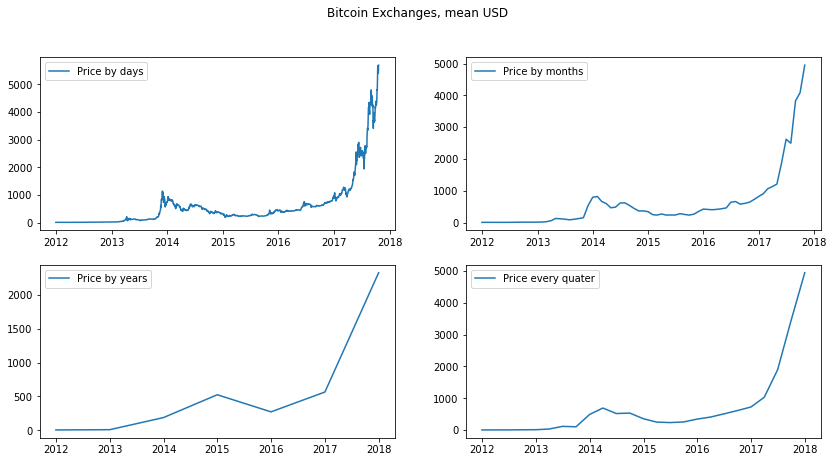

In [12]:
plt.figure(figsize=(14,7))

plt.suptitle('Bitcoin Exchanges, mean USD')

plt.subplot(221)
plt.plot(df.Weighted_Price, label = 'Price by days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, label = 'Price by months')
plt.legend()

plt.subplot(223)
plt.plot(df_year.Weighted_Price, label = 'Price by years')
plt.legend()

plt.subplot(224)
plt.plot(df_quater.Weighted_Price, label = 'Price every quater')
plt.legend()

### Now we check for Statinarity in the data

In [13]:
# AD Fuller test (Augmented Dicky Fuller test)

from statsmodels.tsa.stattools import adfuller

def ad_fuller_test(Weighted_Price):
    result = adfuller(Weighted_Price)
    print('p-value: {}', format(result[1]))
    if result[1] < 0.05:
        print("Strong evidence against Null Hypothesis, indicating the data is stationary")
    else:
        print("Weak evidence against Null Hypothesis, indicating the data is not stationary")

In [14]:
ad_fuller_test(df_year['Weighted_Price'])

p-value: {} 0.9948321175538474
Weak evidence against Null Hypothesis, indicating the data is not stationary


In [15]:
ad_fuller_test(df_month['Weighted_Price'])

p-value: {} 1.0
Weak evidence against Null Hypothesis, indicating the data is not stationary


## Box-Cox Transformations

###### To make the series more linear and the resulting distribution more uniform

In [16]:
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
df_month

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_box
Timestamp,,,,,,,,
2011-12-31,4.472552,4.472624,4.472552,4.472624,7.590527,34.069690,4.472579,1.731340
2012-01-31,6.235412,6.239745,6.231737,6.236086,4.955810,29.527545,6.234949,2.186296
2012-02-29,5.234146,5.234743,5.231709,5.232306,7.153212,37.120786,5.232734,1.942754
2012-03-31,4.960839,4.961539,4.953547,4.953967,13.455398,66.445048,4.958308,1.869493
2012-04-30,4.980709,4.982016,4.979536,4.980802,18.732216,92.674707,4.980866,1.875637
...,...,...,...,...,...,...,...,...
2017-06-30,2619.809885,2621.750939,2617.541451,2619.677824,10.481483,27165.338375,2619.600435,18.116818
2017-07-31,2494.769778,2496.656952,2492.661544,2494.766902,10.054091,24643.849763,2494.630974,17.901681
2017-08-31,3827.965884,3830.885656,3824.345003,3827.909653,8.500598,32596.401999,3827.624063,19.855097


<AxesSubplot:xlabel='Timestamp'>

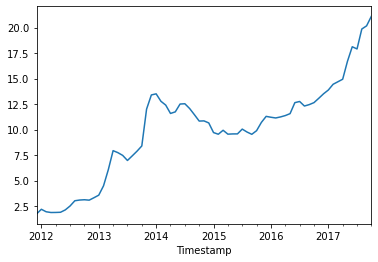

In [17]:
df_month['Weighted_Price_box'].plot()

## Using the differencing method to make the data stationary

In [18]:
df_month['Price_1st_diff'] = df_month['Weighted_Price_box'] - df_month['Weighted_Price_box'].shift(12)

<AxesSubplot:xlabel='Timestamp'>

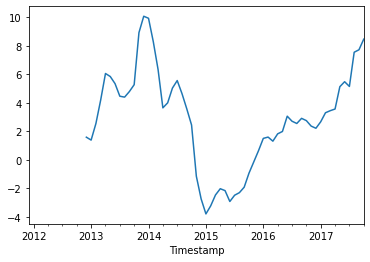

In [19]:
df_month['Price_1st_diff'].plot()

In [20]:
ad_fuller_test(df_month.Price_1st_diff[12:])

p-value: {} 0.1664012599315456
Weak evidence against Null Hypothesis, indicating the data is not stationary


In [21]:
# Again using the differencing the method 
df_month['Price_2nd_diff'] = df_month['Price_1st_diff'] - df_month['Price_1st_diff'].shift(1)

<AxesSubplot:xlabel='Timestamp'>

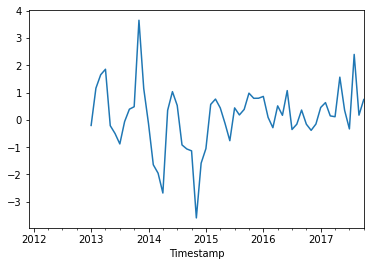

In [22]:
df_month['Price_2nd_diff'].plot()

In [23]:
ad_fuller_test(df_month.Price_2nd_diff[13:])

p-value: {} 0.024551186025489148
Strong evidence against Null Hypothesis, indicating the data is stationary


## Auto-Regressive model

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

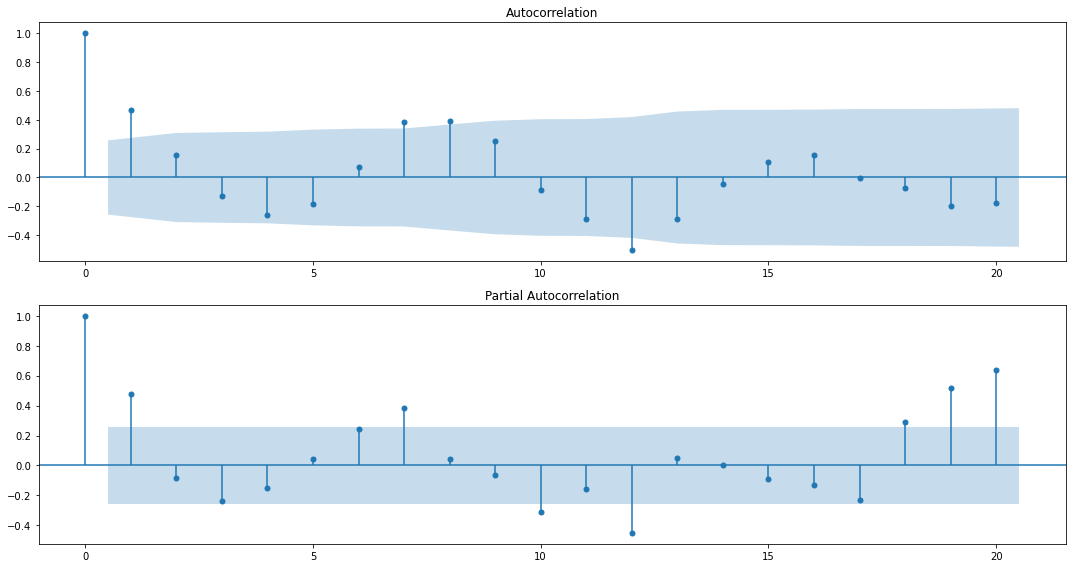

In [25]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_month.Price_2nd_diff.iloc[13:], lags = 20, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_month.Price_2nd_diff.iloc[13:], lags = 20, ax = ax2)
plt.tight_layout()

In [26]:
model = ARIMA(df_month['Weighted_Price'], order = (2,1,2))
model_fit = model.fit()

In [27]:
df_month

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_box,Price_1st_diff,Price_2nd_diff
Timestamp,,,,,,,,,,
2011-12-31,4.472552,4.472624,4.472552,4.472624,7.590527,34.069690,4.472579,1.731340,NaN,NaN
2012-01-31,6.235412,6.239745,6.231737,6.236086,4.955810,29.527545,6.234949,2.186296,NaN,NaN
2012-02-29,5.234146,5.234743,5.231709,5.232306,7.153212,37.120786,5.232734,1.942754,NaN,NaN
2012-03-31,4.960839,4.961539,4.953547,4.953967,13.455398,66.445048,4.958308,1.869493,NaN,NaN
2012-04-30,4.980709,4.982016,4.979536,4.980802,18.732216,92.674707,4.980866,1.875637,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-06-30,2619.809885,2621.750939,2617.541451,2619.677824,10.481483,27165.338375,2619.600435,18.116818,5.480098,0.350836
2017-07-31,2494.769778,2496.656952,2492.661544,2494.766902,10.054091,24643.849763,2494.630974,17.901681,5.148585,-0.331512
2017-08-31,3827.965884,3830.885656,3824.345003,3827.909653,8.500598,32596.401999,3827.624063,19.855097,7.548814,2.400228


<AxesSubplot:xlabel='Timestamp'>

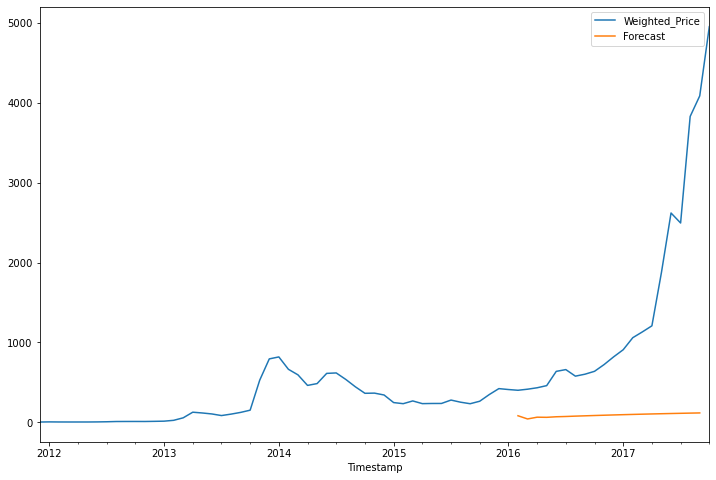

In [28]:
df_month['Forecast'] = model_fit.predict(start = 50, end = 69, dynamic = True)
df_month[['Weighted_Price', 'Forecast']].plot(figsize = (12,8))

# SARIMA MODEL

In [29]:
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [30]:
# Creating a list for the parameters p,d,q

Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

In [31]:
# Model Selection 
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [32]:
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                   Weighted_Price_box   No. Observations:                   71
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 -66.577
Date:                              Sun, 16 Jan 2022   AIC                            145.154
Time:                                      15:20:23   BIC                            157.517
Sample:                                  12-31-2011   HQIC                           149.970
                                       - 10-31-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1441      0.163      7.025      0.000       0.825       1.463
ar.L2         -0.83

In [33]:
# Creating a dataframe for future dates

df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 1, 28)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
future

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_box,Price_1st_diff,Price_2nd_diff,Forecast
2017-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Concatenating the future dates dataframe with the original dataframe
df_month2 = pd.concat([df_month2, future])

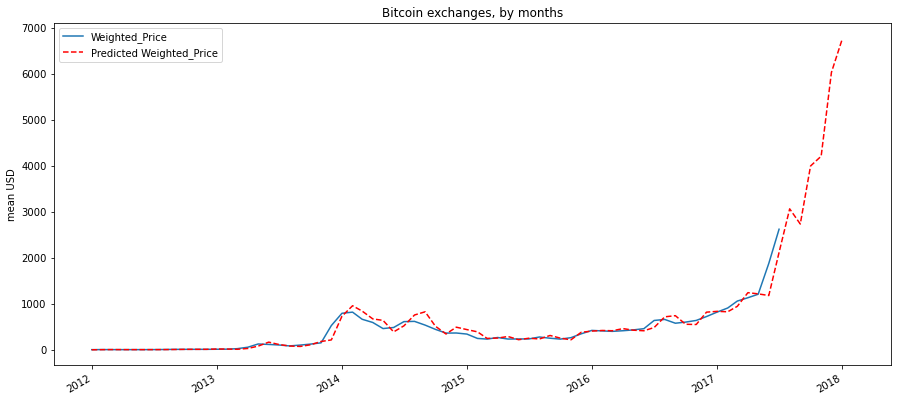

In [35]:
# Plot for the SARIMA Model
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()